In [1]:
import pandas as pd
import json
import re
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab as pl
from networkx.algorithms.community import k_clique_communities

In [4]:
x = pd.read_csv('/home/rubisco/Desktop/insight/dash/final/csv/global.csv', engine='python')
x

,created_at,id,json,mentions,text,username
0,Wed Jan 23 18:48:02 +0000 2019,1088146356114403328,"{u'contributors': None, u'truncated': False, u...","[{u'id': 1039038710799462402, u'indices': [0, ...",@CryptoDave13 @NickGianfe I stopped buying BTC...,PennyRipples
1,Wed Jan 23 18:48:02 +0000 2019,1088146355095248896,"{u'contributors': None, u'truncated': False, u...","[{u'id': 759315340199428096, u'indices': [3, 1...",RT @KewinBrouwer: PEONY (PNY) take a look in t...,CryptoManianer
2,Wed Jan 23 18:48:02 +0000 2019,1088146354923335680,"{u'contributors': None, u'truncated': True, u'...",[],4️⃣[#Blockchain] La Fondation #Linux mise sur ...,FlashTweet
3,Wed Jan 23 18:48:00 +0000 2019,1088146348208254976,"{u'contributors': None, u'truncated': True, u'...","[{u'id': 1075566806461497344, u'indices': [0, ...",@XristineZZ @CONSTRUTORAJAB @ProofofResearch I...,AiryOrange
4,Wed Jan 23 18:48:00 +0000 2019,1088146347520339968,"{u'contributors': None, u'truncated': True, u'...",[],The Atisios program aims at substituting all e...,Andrei56938273
5,Wed Jan 23 18:47:56 +0000 2019,1088146328687923200,"{u'contributors': None, u'truncated': False, u...","[{u'id': 874348944570159106, u'indices': [3, 1...",RT @electroneum: Check out this game called HO...,RealYungMoola
6,Wed Jan 23 18:47:55 +0000 2019,1088146327073107969,"{u'contributors': None, u'truncated': True, u'...",[],Daily Earning:- *3% to 5%*(6days in a week)\nU...,Yaseen39153133
7,Wed Jan 23 18:47:55 +0000 2019,1088146326095826944,"{u'contributors': None, u'truncated': True, u'...",[],You do not need expensive mining equipment or ...,i_am_shadybankz
8,Wed Jan 23 18:47:55 +0000 2019,1088146323981754368,"{u'contributors': None, u'truncated': False, u...","[{u'id': 327460077, u'indices': [3, 10], u'id_...","RT @3lbios: Yes, it uses PID and time(null) as...",sprocotg
9,Wed Jan 23 18:47:54 +0000 2019,1088146321477914624,"{u'contributors': None, u'truncated': False, u...","[{u'id': 125304737, u'indices': [3, 14], u'id_...",RT @blockchain: The dust has settled and we've...,soyhansi


In [3]:
x.iloc[ 74 , : ]

created_at    Starting 1/28 you’ll be able to predict variou...
id                                              PRe9Nfse9H4dnSJ
json                                                       None
mentions                                                   None
text                                                       None
username                                                   None
Name: 74, dtype: object

In [5]:
users = x.loc[: , "username"]
text = x.loc[: , "text"]
senders = []
for user in users:
    if user not in senders:
        senders.append(user)

In [5]:
len(senders)

21933

In [6]:
for user in senders:
    if user == 'DabuzSenpai':
        print(True)

In [6]:
def getWords(text):
    return re.compile('.\w+').findall(text)
print(text[73])

@BBelensay Hocam benim profile de bakar mısınız kod uygunluk için

#bist
#bist100 
#usdtry
#XU100 
#𝒷𝑒𝓁𝑒𝓃𝓈𝒶𝓎… https://t.co/3LGCNaHjiF


In [7]:
receiver = []
i = 0
for element in text:
    if element != None:
        words = getWords(element)
    for word in words:
        if word[0] == '@':
            if word[1:] not in receiver:
                receiver.append(word[1:])

In [9]:
total = []
for element in receiver:
    total.append(element)
for element in senders:
    if element not in total:
        total.append(element)

In [10]:
len(total)

37861

In [11]:
interaction = []
for index, row in x.iterrows():
    string = str(row['text'])
    user = str(row['username'])
    words = getWords(string)
    if len(words) > 0:
        if words[0] != 'RT':
            for element in words:
                if element[0] == '@':
                    if (user, element[1:]) not in interaction:
                        interaction.append((user, element[1:]))

In [12]:
len(interaction)

17703

In [13]:
interaction.sort()
interaction

[('01101101arMar', 'Crypto_Twitt_r'),
 ('0xbytes', 'ferdousbhai'),
 ('10kbasispoints', 'CredibleCrypto'),
 ('10monori_m', 'ganbarumasu0525'),
 ('10monori_m', 'oidenya'),
 ('10monori_m', 'tawtaw3'),
 ('110Zerstorer', 'Cryptopia_NZ'),
 ('1815vivek', 'ChiefMinisterUP'),
 ('1815vivek', 'DDNewsLive'),
 ('1815vivek', 'PKumar59'),
 ('1815vivek', 'UPBtcbatch_2015'),
 ('1815vivek', 'Yogi_Aditynath'),
 ('1815vivek', 'btc_morcha_2015'),
 ('1815vivek', 'myogiadityanath'),
 ('19621021Maikeru', 'oyumaru_xrp'),
 ('1971NewOrder', 'Crypto_Bitlord'),
 ('1980SteveH36', 'Ripple'),
 ('1980SteveH36', 'XRPTrump'),
 ('1980SteveH36', 'swiftcommunity'),
 ('198cmXP', 'XRP_TamaGox'),
 ('1Gerbs', 'BIS_org'),
 ('1Gerbs', 'coindesk'),
 ('1Gerbs', 'j_kemperman'),
 ('1MfgErt0', 'death_btc'),
 ('1bdi_', 'inversebrah'),
 ('1brokerA', 'FreakyCrypto'),
 ('1brokerA', 'WCXofficial'),
 ('1brokerA', 'tradingroomapp'),
 ('1educatedpsycho', 'Crypto_Bitlord'),
 ('1st_leinad', 'Crypto_Bitlord'),
 ('21MillionCoins', 'btc_joe'),
 (

In [14]:
dic = {}
for element in interaction:
    for word in element:
        if word in dic:
            dic[word] += 1
        if word not in dic:
            dic[word] = 1

In [15]:
major = []
for element in dic:
    if dic[element] > 20:
        major.append(element)
major

['Cryptopia_NZ',
 'Crypto_Bitlord',
 'Ripple',
 'XRPTrump',
 'coindesk',
 'death_btc',
 'tradingroomapp',
 'CoinMarketApp',
 'EtherWorldNews',
 'APompliano',
 'btc_ryu',
 'RichardHeartWin',
 'Upthinity',
 'galgitron',
 'altcoin_fantasy',
 'crypto_blkbeard',
 'digitexfutures',
 'PeterLBrandt',
 'cointelegraph',
 'momochan_BTC',
 'BTC_Macro',
 'CRYPTO_SWEETy',
 'kurara_crypto',
 'freecoinhunt',
 'crazy_crypto',
 'cz_binance',
 'brian_armstrong',
 'LeeR912',
 'HamEggsn',
 'XPetroleum_xpl',
 'coinbase',
 'crypto_necro',
 'The_Rippening',
 'XrpMr',
 'CryptoShillNye',
 'CryptoVanessa',
 'DecentralizeTRX',
 'JovicicZiko',
 'Matthewhagger85',
 'otsz',
 'WillyWonkaXRP',
 'Compass_Crypto',
 'XRP_Princes',
 'YouTube',
 'kousiki_btc',
 'Tronfoundation',
 'justinsuntron',
 'crypto_bobby',
 'yamtmemb_btc',
 'crypto_rand',
 'parisbydavid',
 'giacomozucco',
 'binance',
 'BankXRP',
 'Crypto_Ed_NL',
 'Crypto_Strong',
 'Crypto_Boy1',
 'BlocsNews',
 'kingblue_XRP',
 'DiepSanh',
 'boyd_oakes',
 'cryptomorr

In [16]:
for element in text:
    words = getWords(element)
    for word in words:
        if word[0] == '@':
            if word[1:] == 'LazyMoe1':
                print(element)

TypeError: expected string or bytes-like object

In [17]:
G=nx.Graph()

In [18]:
G.add_nodes_from(total)

In [19]:
G.add_edges_from(interaction)

In [20]:
G.number_of_nodes()
G.number_of_edges()
cluster = nx.clustering(G)

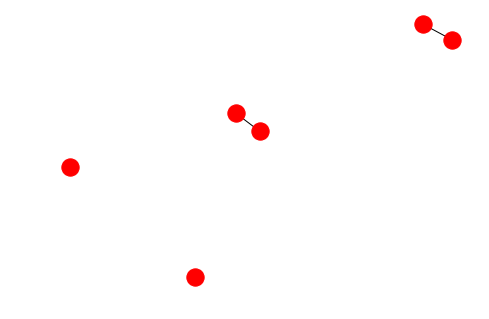

In [21]:
pol = G.subgraph(major)  

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


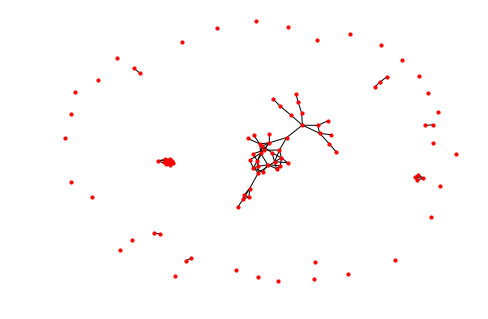

In [22]:
nx.draw(pol, node_size=10);

In [23]:
x = nx.betweenness_centrality(G)

In [112]:
x['MVG_Mew2King']

0.00962032503552528

In [24]:
influencer = []
for element in x:
    if x[element] > 0.00001:
        influencer.append(element)
len(influencer)

1609

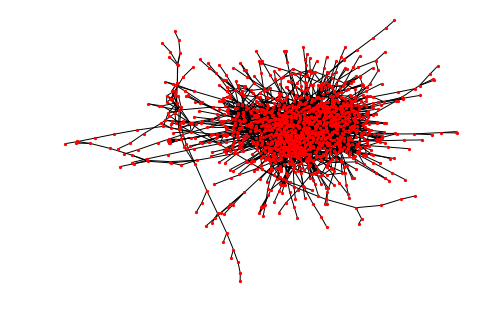

In [25]:
k = G.subgraph(influencer) 
nx.draw(k, with_labels=False, node_size=5)
#nx.draw(k);

In [26]:
list(k_clique_communities(k, 5))

[frozenset({'DecentralizeTRX',
            'Eric49271287',
            'JovicicZiko',
            'Matthewhagger85',
            'Troy29960948',
            'dontknowmuch101',
            'producerknoidea'}),
 frozenset({'Alexcryptox',
            'Mz420Momentz',
            'The_Rippening',
            'WillyWonkaXRP',
            'kingblue_XRP'}),
 frozenset({'Compass_Crypto',
            'OTB_Rising',
            'OttoGunger',
            'Paisan26849860',
            'spqrlee',
            'xrpNuts'}),
 frozenset({'Compass_Crypto',
            'LeoHadjiloizou',
            'NewJackHodler',
            'The_Mainlander',
            'XRPMichaelB',
            'XrpMr',
            'ecossexrp1',
            'erst69',
            'jussyc123',
            'parisbydavid',
            'xrpNuts'}),
 frozenset({'anaaki1028',
            'btcfx98042053',
            'takaomisohoru',
            'tazawa_xrp',
            'xrpjp'}),
 frozenset({'Bull0fBitcoin',
            'Crypt_Malone',
     